In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.linear_model import LogisticRegression 

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
import joblib

In [11]:
df = pd.read_csv('creditcard.csv')

In [12]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
df.Class.unique()

array([0, 1], dtype=int64)

In [15]:
df.Class = df.Class.apply(lambda x: '0' if x == 0 else "1")

<AxesSubplot:>

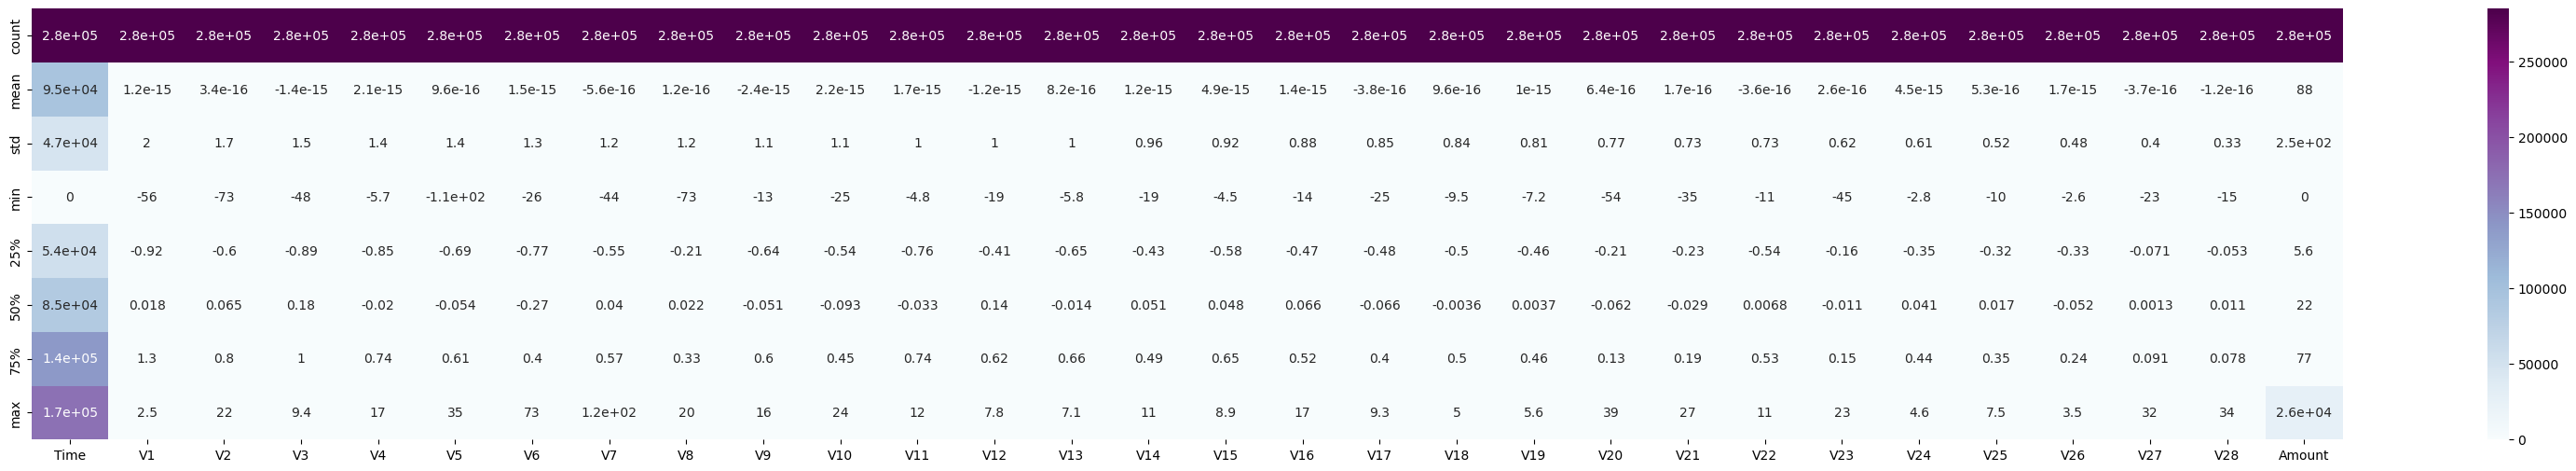

In [16]:
plt.figure(figsize=(40,6))
sns.heatmap(df.describe(), annot=True, cmap='BuPu')

Class
0    284315
1       492
Name: count, dtype: int64


<AxesSubplot:xlabel='Class'>

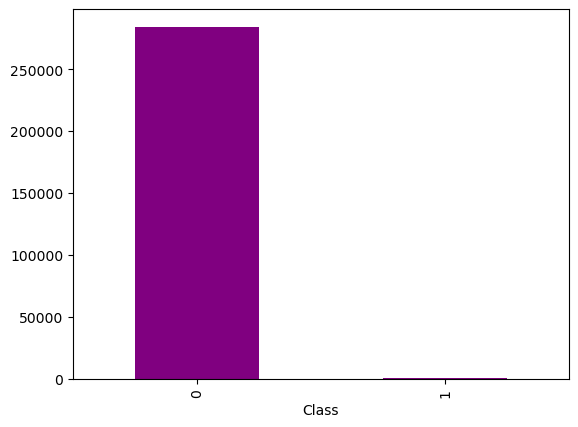

In [17]:
print(df.Class.value_counts())
df.Class.value_counts().plot(kind='bar', color='purple')

0 >> 'Legal Transaction'

1 >> 'Scam/Fraudulent Tansaction'

<AxesSubplot:xlabel='Amount', ylabel='Class'>

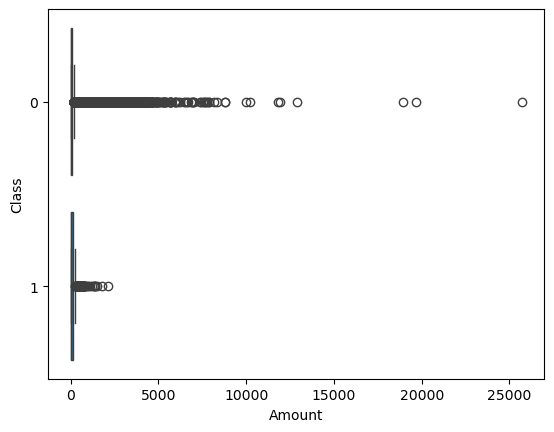

In [18]:
sns.boxplot(data=df, x="Amount", y="Class")

<AxesSubplot:xlabel='Time', ylabel='Amount'>

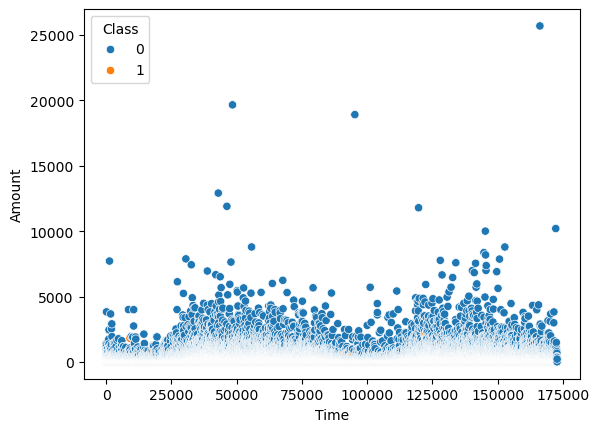

In [19]:
sns.scatterplot(data=df, x='Time', y='Amount', hue='Class')

In [20]:
df.duplicated().sum()

1081

In [21]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [22]:
df_duplicated = df[df.duplicated(subset=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])==True]

In [23]:
df_duplicated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [24]:
dataset_value = 284807 
duplicate_value = 1081 

After_drop = dataset_value - duplicate_value
After_drop

283726

In [25]:
df.drop_duplicates(subset=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [26]:
X = df.drop('Class', axis=1)

In [27]:
y = df.Class

In [28]:
print(X[:2])
print('---'*3)
print(y[:2])

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  

[2 rows x 30 columns]
---------
0    0
1    0
Name: Class, dtype: object


In [29]:
scaler = StandardScaler()

In [30]:
X_scaled = scaler.fit_transform(X)

In [31]:
X_scaled[:1]

array([[-1.99658302, -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426]])

<AxesSubplot:title={'center':'Before Scaling'}, xlabel='Amount', ylabel='Time'>

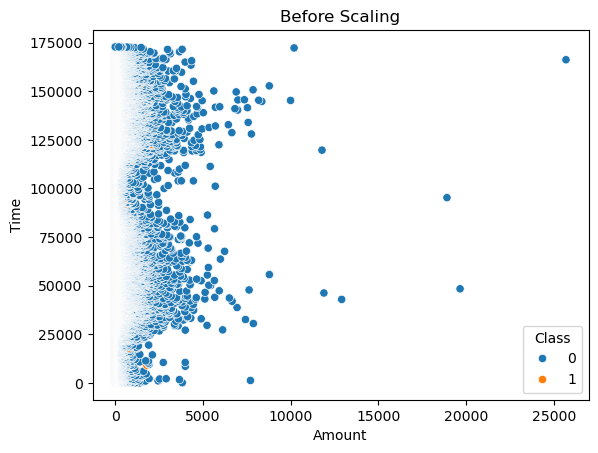

In [32]:
plt.title('Before Scaling')
sns.scatterplot(x=X['Amount'], y=X['Time'], hue=y)

In [33]:
X_scaled_df = pd.DataFrame(X_scaled, columns= X.columns)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Amount', ylabel='Time'>

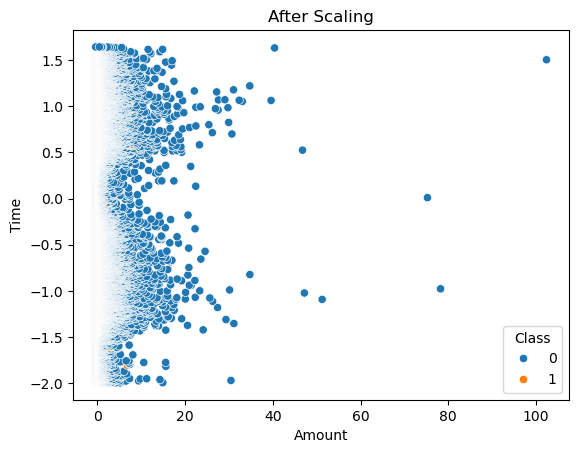

In [34]:
plt.title('After Scaling')
sns.scatterplot(x=X_scaled_df['Amount'], y=X_scaled_df['Time'], hue=y)

In [35]:
smote = SMOTE(random_state=42)

In [36]:
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

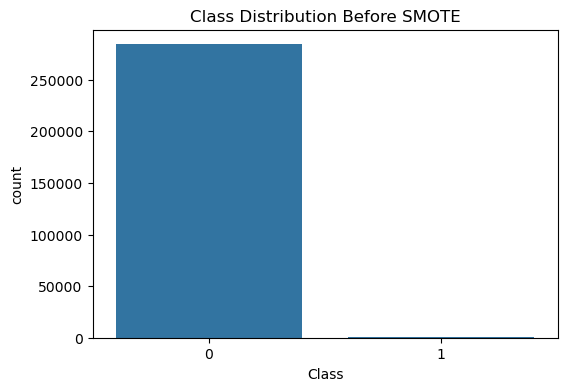

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x=y) 
plt.title("Class Distribution Before SMOTE")
plt.show()

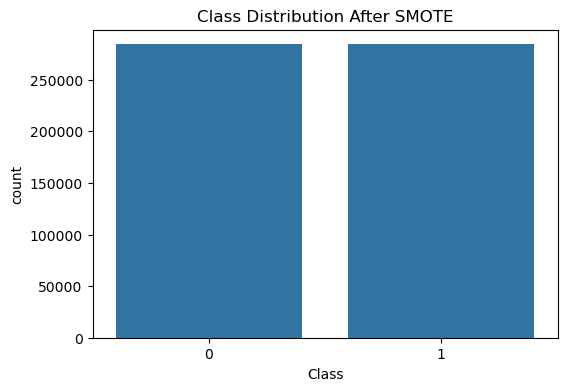

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_balanced) 
plt.title("Class Distribution After SMOTE")
plt.show()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X_balanced, y_balanced, train_size=0.8, test_size=0.2)

In [40]:
lr = LogisticRegression()

In [41]:
rft = RandomForestClassifier(n_estimators=10)

In [42]:
lr.fit(x_train, y_train)

LogisticRegression()

In [43]:
rft.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
y_pred_lr = lr.predict(x_test)

In [45]:
y_pred_rft = rft.predict(x_test)

In [46]:
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

In [47]:
conf_matrix_rft = confusion_matrix(y_test, y_pred_rft)

In [48]:
accuracy_scores = [
    {'Model': 'Logistic Regression', 'Accuracy Score': accuracy_score(y_test, y_pred_lr)},
    {'Model': 'Random Forest Tree', 'Accuracy Score': accuracy_score(y_test, y_pred_rft)},
]

accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)
accuracy_df.head()

,Model,Accuracy Score
1,Random Forest Tree,0.999903
0,Logistic Regression,0.949220


<AxesSubplot:>

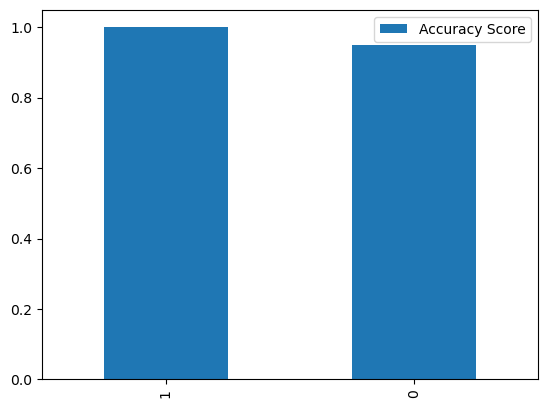

In [49]:
accuracy_df.plot(kind='bar')

In [50]:
joblib.dump(rft, 'rft_model.pkl')

['rft_model.pkl']

In [51]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

<AxesSubplot:title={'center':'Confusion Matrix for Random Forest'}>

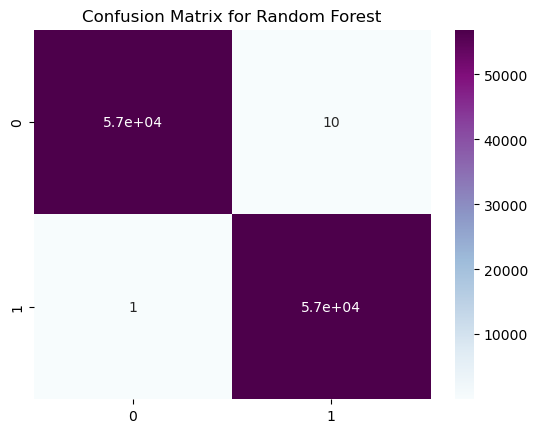

In [52]:
plt.title('Confusion Matrix for Random Forest')
sns.heatmap(confusion_matrix(y_test, y_pred_rft), annot=True, cmap='BuPu')

<AxesSubplot:title={'center':'Confusion Matrix for Logistic Regression'}>

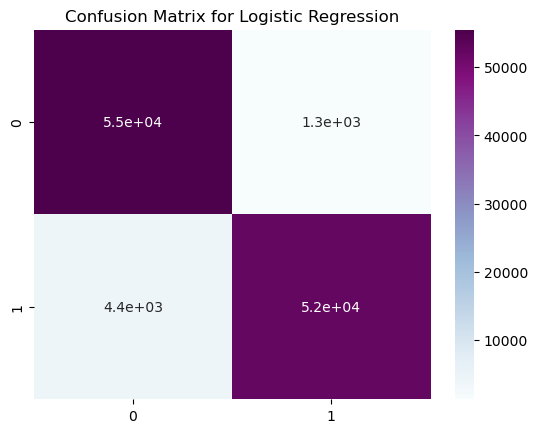

In [53]:
plt.title('Confusion Matrix for Logistic Regression')
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap='BuPu')

In [54]:
# Done